In [1]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

In [2]:
pyo.init_notebook_mode()

Data Collection and Preparation

In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\Projects for abroad\Python\Python Project 1\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# Check for any NaN values introduced after conversion
missing_total_charges = df['TotalCharges'].isnull().sum()
missing_total_charges

11

In [7]:
df['TotalCharges'].fillna(0, inplace=True)

In [8]:
#Create Tenure Groups: Group the tenure column into categories like "New Customer," "Mid-term Customer," and "Loyal Customer" based on their duration
bins = [0, 12, 36, df['tenure'].max()]  # Define the cut-off points
labels = ['New Customer', 'Mid-term Customer', 'Loyal Customer']  # Define the group names

# Create a new column 'TenureGroup' based on the bins and labels
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

In [9]:
df[['tenure', 'TenureGroup']].head()

tenure        TenureGroup
0       1       New Customer
1      34  Mid-term Customer
2       2       New Customer
3      45     Loyal Customer
4       2       New Customer

In [10]:
# Define a function to classify service usage
def classify_service(row):
    if row['InternetService'] == 'No':
        return 'Basic Service'
    elif row['InternetService'] in ['DSL', 'Fiber optic']:
        if row['OnlineSecurity'] == 'Yes' or row['TechSupport'] == 'Yes':
            return 'Premium Service'
        else:
            return 'Standard Service'
    return 'Basic Service'

In [11]:
# Apply the function to create a new column 'ServiceCategory'
df['ServiceCategory'] = df.apply(classify_service, axis=1)

In [12]:
df[['InternetService', 'OnlineSecurity', 'TechSupport', 'ServiceCategory']].head()

InternetService OnlineSecurity TechSupport   ServiceCategory
0             DSL             No          No  Standard Service
1             DSL            Yes          No   Premium Service
2             DSL            Yes          No   Premium Service
3             DSL            Yes         Yes   Premium Service
4     Fiber optic             No          No  Standard Service

Data Exploration

Histogram and Boxplot

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



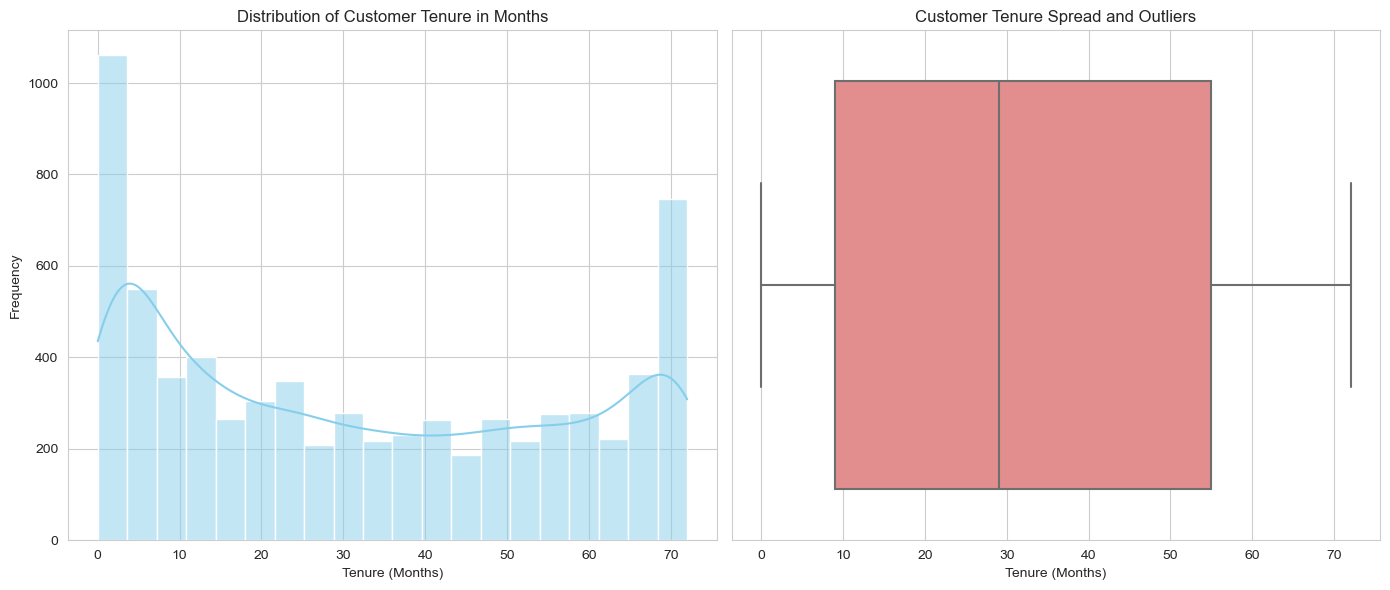

In [14]:
# Set the style for seaborn plots
sns.set_style('whitegrid')

# Create a figure with subplots for the histogram and box plot
plt.figure(figsize=(14, 6))

# Histogram of 'tenure'
plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Tenure in Months')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')

# Box plot of 'tenure'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['tenure'], color='lightcoral')
plt.title('Customer Tenure Spread and Outliers')
plt.xlabel('Tenure (Months)')

# Display the plots
plt.tight_layout()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



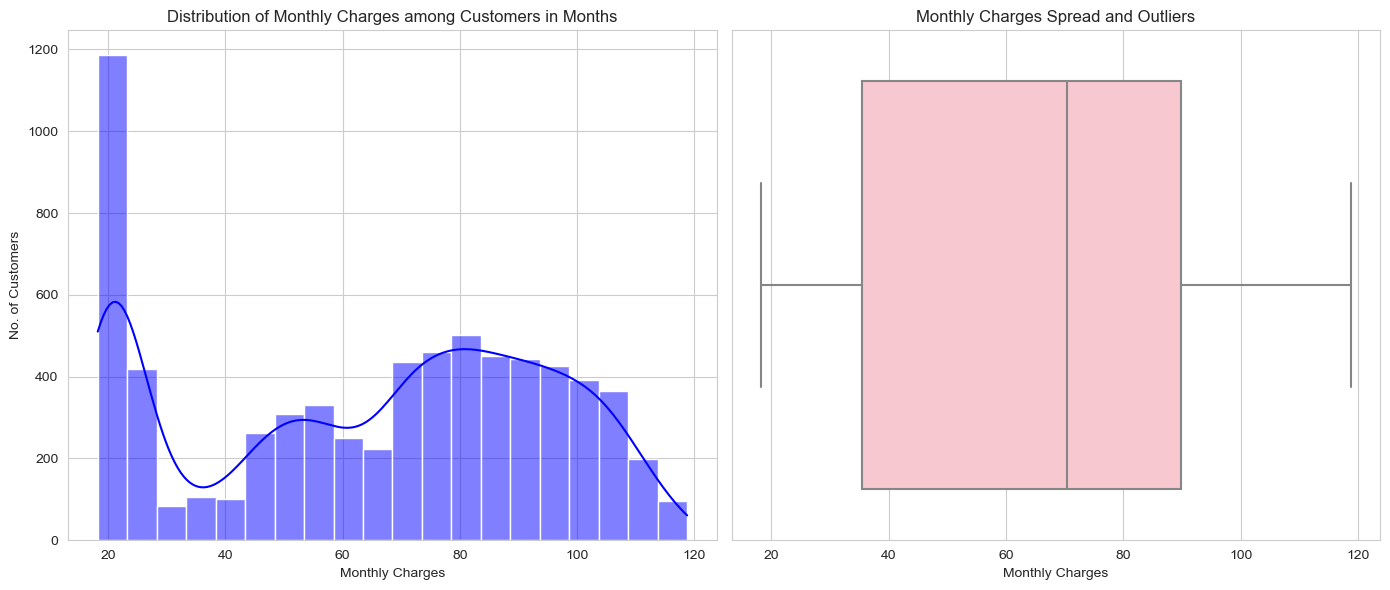

In [15]:
# Set the style for seaborn plots
sns.set_style('whitegrid')

# Create a figure with subplots for the histogram and box plot
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], bins=20, kde=True, color='blue')
plt.title('Distribution of Monthly Charges among Customers in Months')
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')


plt.subplot(1, 2, 2)
sns.boxplot(x=df['MonthlyCharges'], color='pink')
plt.title('Monthly Charges Spread and Outliers')
plt.xlabel('Monthly Charges')

# Display the plots
plt.tight_layout()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



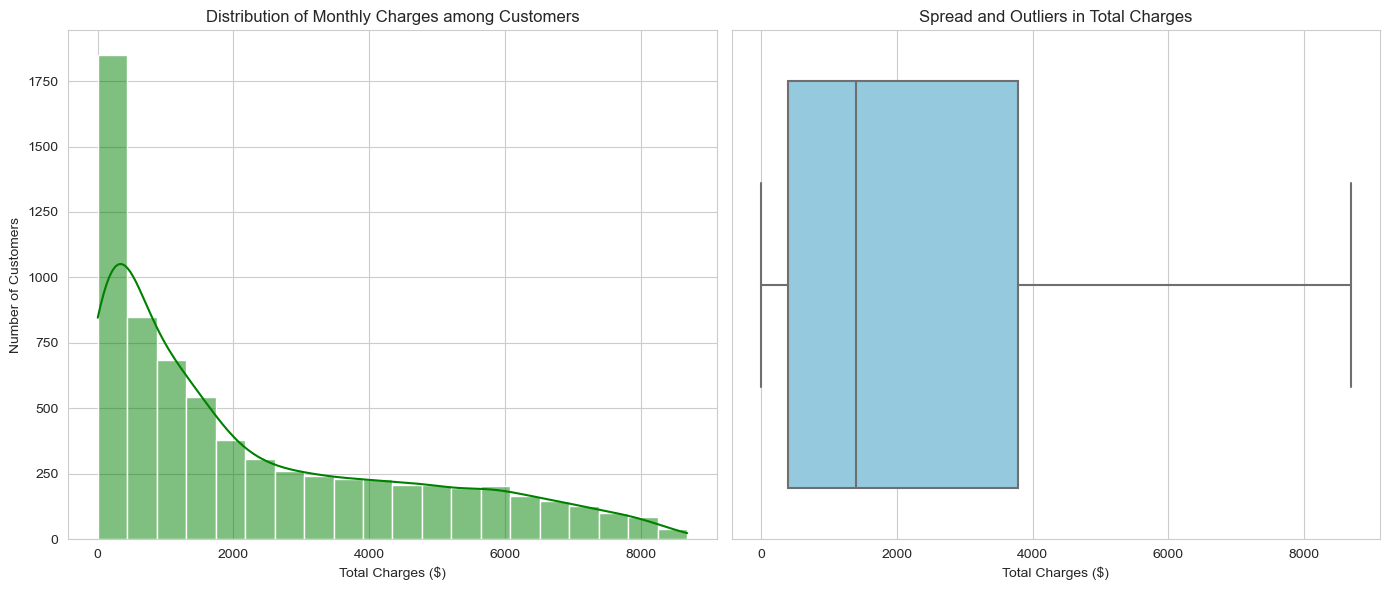

In [16]:
# Set the style for seaborn plots
sns.set_style('whitegrid')

# Create a figure with subplots for the histogram and box plot
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['TotalCharges'], bins=20, kde=True, color='green')
plt.title('Distribution of Monthly Charges among Customers')
plt.xlabel('Total Charges ($)')
plt.ylabel('Number of Customers')

# Box plot of 'MonthlyCharges'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['TotalCharges'], color='skyblue')
plt.title('Spread and Outliers in Total Charges')
plt.xlabel('Total Charges ($)')

# Display the plots
plt.tight_layout()
plt.show()


Correlation Heatmap

The correlation matrix values range from -1 to 1:
-1 indicates a perfect negative correlation.
1 indicates a perfect positive correlation.
0 indicates no correlation.


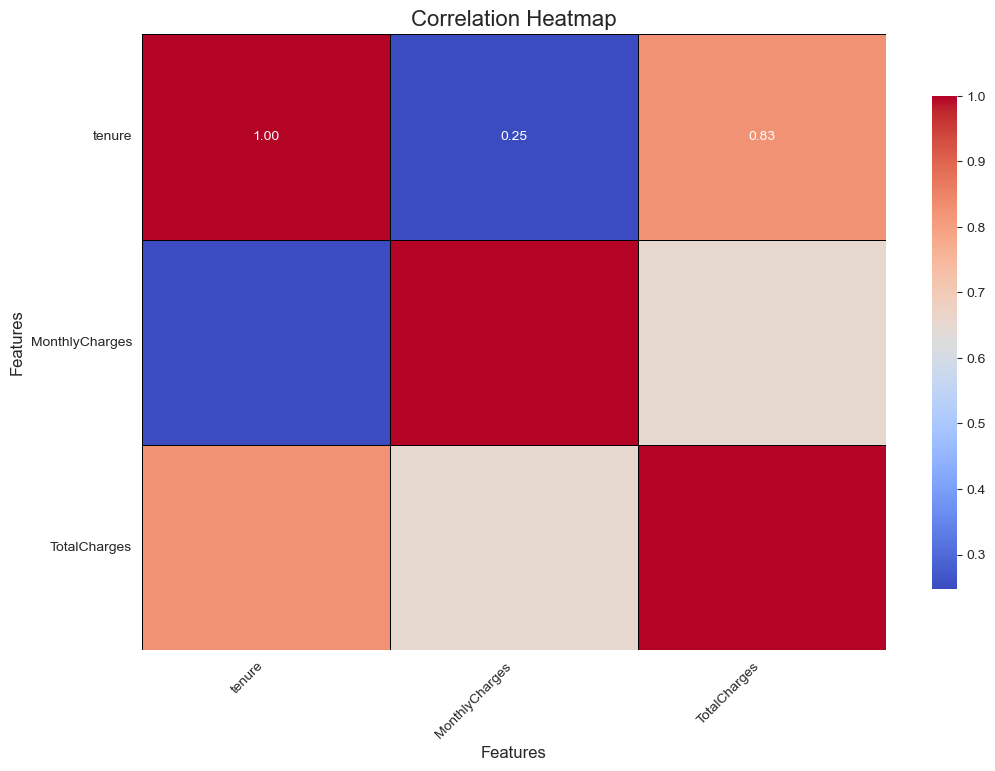

In [17]:
# Create a subset DataFrame excluding the 'Senior Citizen' column
df_subset = df.drop(columns=['SeniorCitizen'])

# Calculate the correlation matrix for the subset DataFrame
corr_matrix = df_subset.corr(numeric_only=True)

# Explanation about the correlation values
print("The correlation matrix values range from -1 to 1:")
print("-1 indicates a perfect negative correlation.")
print("1 indicates a perfect positive correlation.")
print("0 indicates no correlation.")

plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',               # Format for the annotation text (2 decimal places)
                      linewidths=0.5,          # Width of the lines that divide each cell
                      linecolor='black',       # Color of the lines dividing each cell
                      cbar_kws={'shrink': .8})  # Color bar shrinkage (adjust size of the color bar)

# Add labels and title
plt.title('Correlation Heatmap', fontsize=16)  # Title of the heatmap
plt.xlabel('Features', fontsize=12)             # X-axis label
plt.ylabel('Features', fontsize=12)             # Y-axis label

# Adjust tick labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

# Display the heatmap
plt.show()


Churn Rate Overview

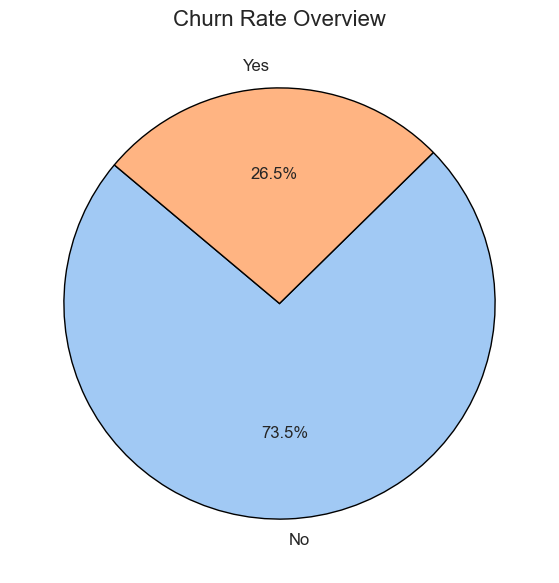

In [18]:
data = df['Churn']

# Convert categorical data to counts
counts = data.value_counts()

# Set the color palette for the pie chart using Seaborn
colors = sns.color_palette('pastel')[0:len(counts)]

# Create a figure and axis
plt.figure(figsize=(10, 7))  # Set the figure size

# Plot the pie chart
plt.pie(counts.values,                    # Pie sizes
        labels=counts.index,
        autopct='%1.1f%%',           # Format for the percentage display
        colors=colors,               # Colors for each slice
        startangle=140,              # Start angle for the pie chart
        wedgeprops={'edgecolor': 'black'},  # Edge color of the slices
        textprops={'fontsize': 12},  # Font size for the text
       )

# Add a title
plt.title('Churn Rate Overview', fontsize=16)  # Title of the pie chart

# Display the pie chart
plt.show()

Service Usage Patterns

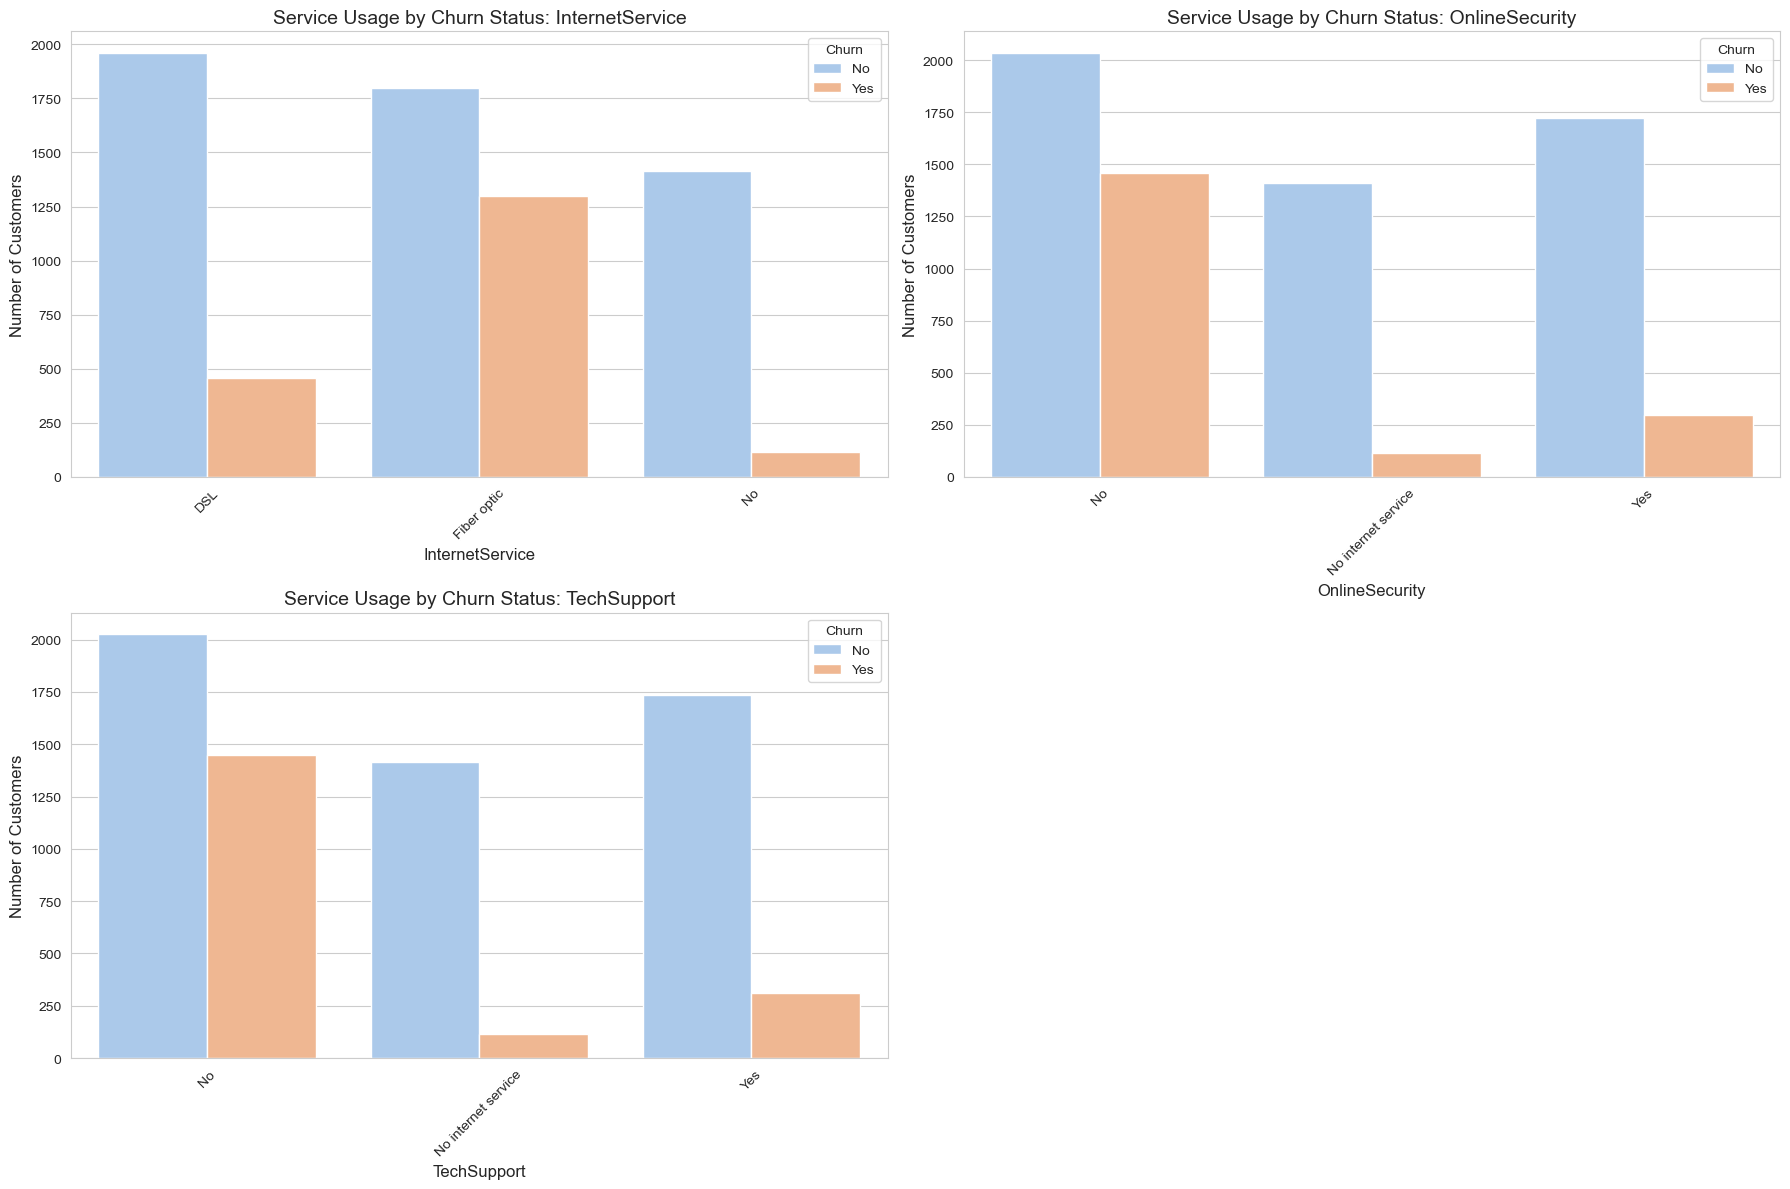

In [19]:
# List of service-related columns you want to analyze
service_columns = ['InternetService', 'OnlineSecurity', 'TechSupport']

# Create a figure for multiple subplots
plt.figure(figsize=(18, 12))

# Loop through each service feature to create a bar chart
for i, column in enumerate(service_columns, 1):
    # Group by churn status and the selected column, then count occurrences
    service_counts = df.groupby(['Churn', column]).size().reset_index(name='Count')
    
    # Create a subplot for each service feature
    plt.subplot(2, 2, i)  # Adjust subplot grid as needed based on the number of columns
    
    # Create a bar plot to visualize the service usage by churn status
    sns.barplot(x=column, y='Count', hue='Churn', data=service_counts, palette='pastel')
    
    # Set plot title and labels
    plt.title(f'Service Usage by Churn Status: {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    
    # Rotate x-axis labels if necessary for readability
    plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

Feature Impact Using Random Forest model

In [20]:
#importing librariess for Random Forest Classification
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [21]:
# Encode categorical features
le = LabelEncoder()
df['Contract'] = le.fit_transform(df['Contract'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

In [22]:
# Features and target variable
X = df[['Contract', 'PaymentMethod', 'tenure']]
y = df['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

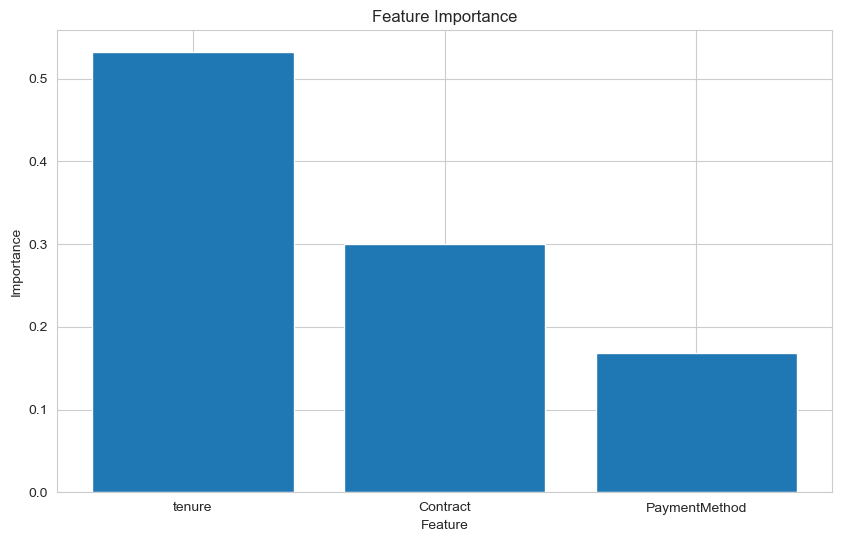

In [23]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

Tenure vs Monthly Charges Analysis

In [24]:
# Group the dataset by the 'tenure' column and calculate the average 'MonthlyCharges'
tenure_monthly_charges = df.groupby('tenure')['MonthlyCharges'].mean().reset_index()

# Display the first few rows of the grouped data
tenure_monthly_charges.head()

tenure  MonthlyCharges
0       0       41.418182
1       1       50.485808
2       2       57.206303
3       3       58.015000
4       4       57.432670

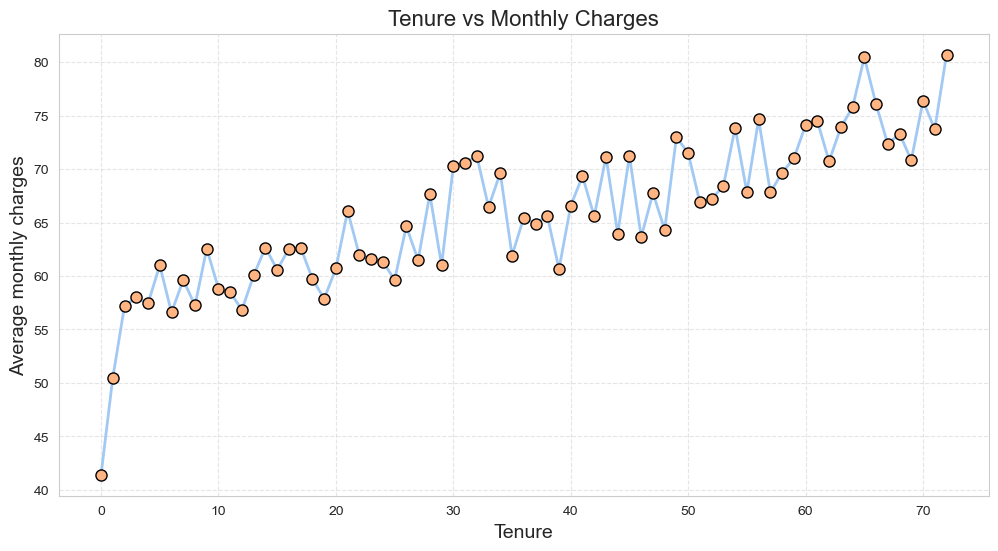

In [25]:
colors = sns.color_palette('pastel')

# Create a figure and axis
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the line chart
plt.plot(tenure_monthly_charges['tenure'],  # x values
         tenure_monthly_charges['MonthlyCharges'],   #y values
         color=colors[0],                    # Line color
         marker='o',                         # Marker style
         linestyle='-',                      # Line style
         linewidth=2,                        # Line width
         markersize=8,                       # Marker size
         markerfacecolor=colors[1],          # Marker face color
         markeredgewidth=1,                  # Marker edge width
         markeredgecolor='black'             # Marker edge color
        )

# Set axis labels
plt.xlabel('Tenure', fontsize=14)          # x-axis label
plt.ylabel('Average monthly charges', fontsize=14)  # y-axis label

# Add a title
plt.title('Tenure vs Monthly Charges', fontsize=16)  # Title of the line chart

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5)       # Add a light grid with dashed lines

# Display the line chart
plt.show()


Heatmap of Service Combinations

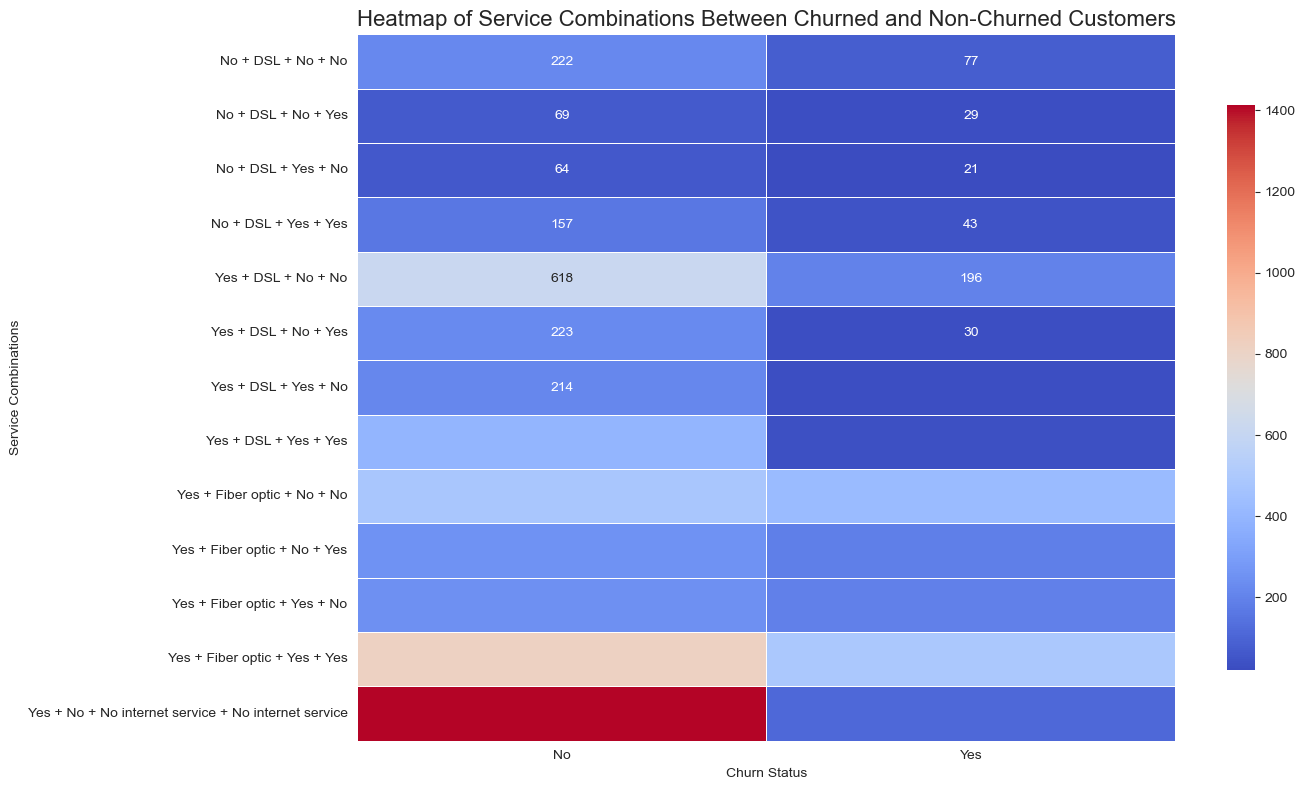

In [26]:
# Create a new column representing service combinations
# Example combination: "Phone + Internet + StreamingTV"
df['ServiceCombination'] = df['PhoneService'].astype(str) + ' + ' + df['InternetService'] + ' + ' + df['StreamingTV'] + ' + ' + df['StreamingMovies']

# Group data by Churn and Service Combination
service_combinations = df.groupby(['Churn', 'ServiceCombination']).size().reset_index(name='Count')

# Pivot the data for the heatmap
heatmap_data = service_combinations.pivot(index='ServiceCombination', columns='Churn', values='Count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f', linewidths=0.5, cbar_kws={'shrink': .8})
plt.title('Heatmap of Service Combinations Between Churned and Non-Churned Customers', fontsize=16)
plt.xlabel('Churn Status')
plt.ylabel('Service Combinations')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the heatmap
plt.show()

Segment Analysis

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Select relevant numerical features for clustering
features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

In [29]:
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [30]:
# Determine the optimal number of clusters using the Elbow Method
sse = []  # Sum of Squared Errors
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of

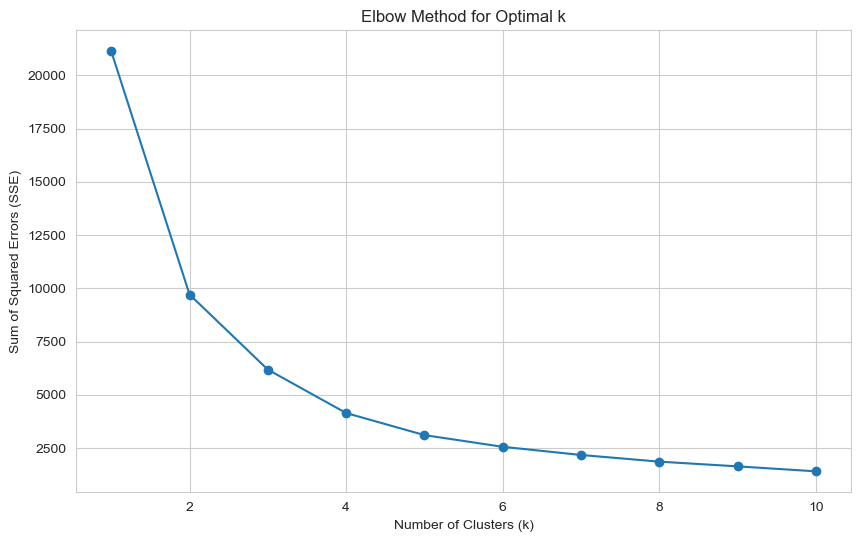

In [31]:
# Plot the Elbow Method graph to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [32]:
# Apply K-means clustering with the optimal number of clusters (choose k based on the elbow plot)
optimal_k = 3  # Assume the elbow is at k=3, adjust based on the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



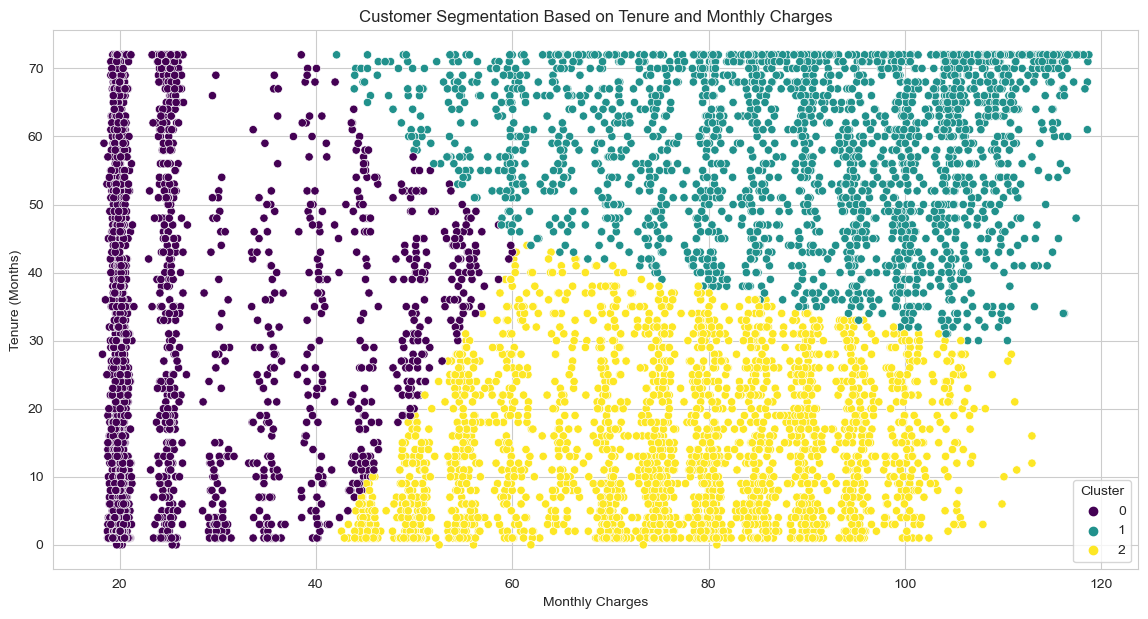

In [33]:
# Visualize clusters using a scatter plot
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='MonthlyCharges', y='tenure', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Based on Tenure and Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure (Months)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [34]:
# Analyze churn rate within each cluster
cluster_churn = df.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack() * 100


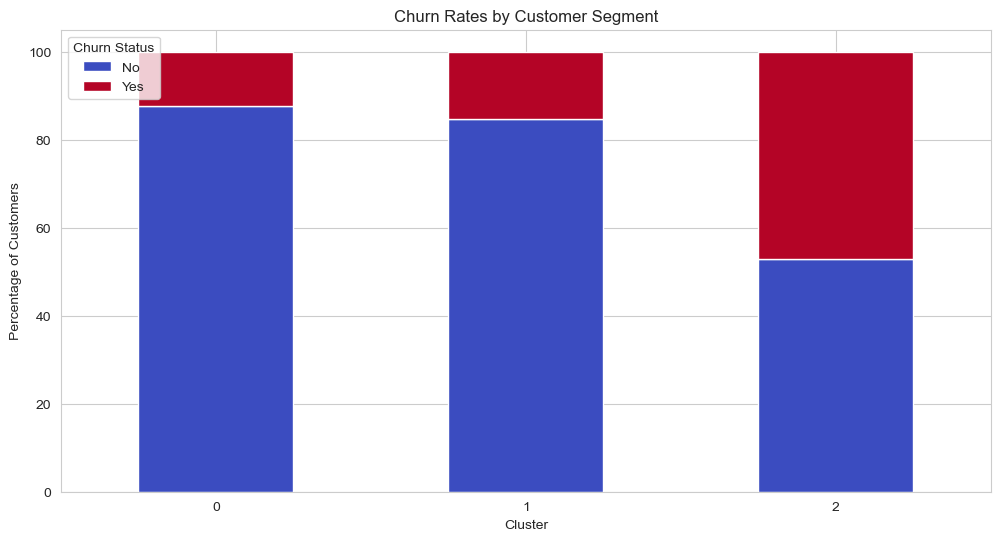

In [35]:
# Plot churn rates by cluster
cluster_churn.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Churn Rates by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn Status', loc='upper left')
plt.grid(True)
plt.show()

Predictive Insights using Decision Tree Visualization

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [37]:
# Preprocessing: Convert categorical columns to numeric
# Convert the 'Churn' column to binary format (Yes = 1, No = 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [38]:
# Select relevant features and target variable
# Include numerical and selected categorical features (converting categorical to numeric)
features = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod']]
features = pd.get_dummies(features)  # Convert categorical variables to dummy variables
target = df['Churn']

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [40]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # max_depth controls the complexity of the tree

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(X_test)

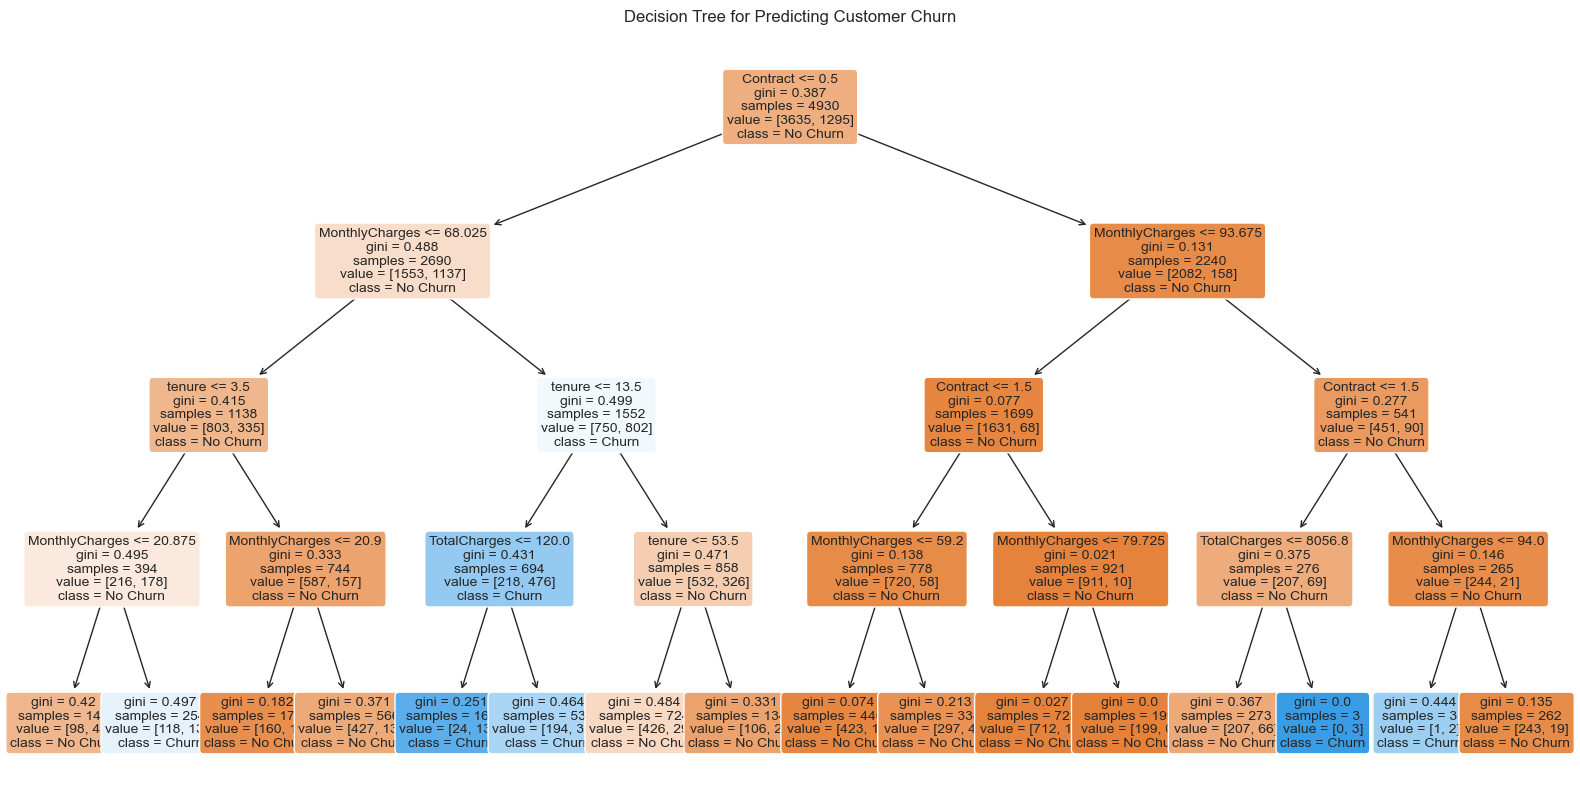

In [41]:
# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()

Predictive Insights using Partial Dependency Plots

In [42]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


Missing values in each column:
 gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
TenureGroup           362
ServiceCategory         0
ServiceCombination      0
Cluster                 0
dtype: int64
Shape of the dataset after dropping missing values: (6681, 24)
Shape of X: (6681, 44)
Shape of y: (6681,)


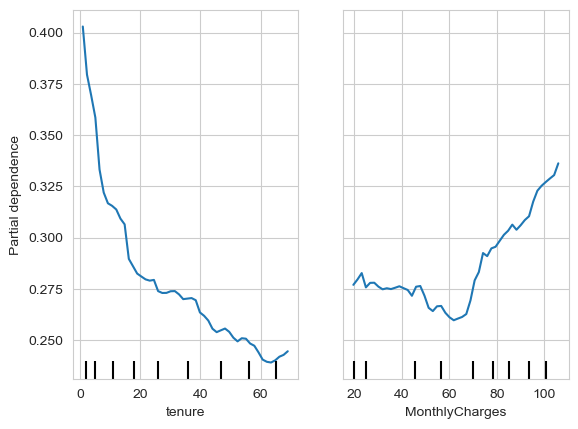

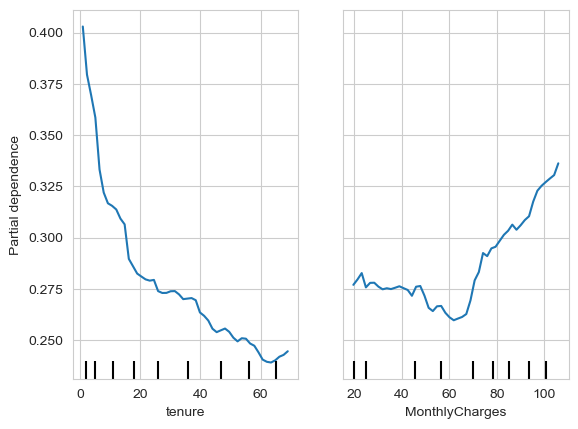

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


# Drop CustomerID (as it's not needed)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# Convert 'TotalCharges' to numeric (handle missing values by coercing errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Check the shape of the dataset after dropping missing values
print("Shape of the dataset after dropping missing values:", df.shape)

# Separate features and target variable (Churn)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Encode categorical features using pd.get_dummies (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable 'Churn' to binary values (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the shape of X and y after encoding
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Define features to plot Partial Dependence for
features_to_plot = ['tenure', 'MonthlyCharges']

# Plot Partial Dependence
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, features_to_plot, kind="average", grid_resolution=50
)

display.plot()
plt.show()
